# Illustrate TARGET and the Molecular Oncology Almanac
The Molecular Oncology Almanac utilized TARGET as a starting point to further develop as a molecular alteration - clinical action knowledgebase. Here, we illustrate how TARGET was utilized and how the Molecular Oncology Almanac has grown.

In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import sys

sys.path.append('../../../common/')
import settings
settings.set_arial_as_font()
colors = settings.Colors

%matplotlib inline

TARGET_PATH = 'almanac-comparison.xlsx'
MOALMANAC_PATH = '../moalmanac-db/content/*'

In [2]:
target = pd.read_excel(TARGET_PATH)
handles = glob.glob(MOALMANAC_PATH)
almanac = {}

almanac_counts = pd.DataFrame(index={'sensitive', 'resistance', 'prognosis'})

for handle in handles:
    dtype = handle.split('/')[-1].split('.tsv')[0]
    tmp = pd.read_csv(handle, sep='\t')
    n_sensitive = tmp['therapy_sensitivity'].dropna().shape[0]
    n_resistance = tmp['therapy_resistance'].dropna().shape[0]
    n_prognosis = tmp['favorable_prognosis'].dropna().shape[0]
    print(tmp.columns)
    almanac_counts.loc['sensitive', dtype] = n_sensitive
    almanac_counts.loc['resistance', dtype] = n_resistance
    almanac_counts.loc['prognosis', dtype] = n_prognosis
almanac_counts.fillna(0, inplace=True)
almanac_counts['totals'] = almanac_counts.sum(axis=1).astype(int)

Index(['event', 'disease', 'context', 'oncotree_term', 'oncotree_code',
       'therapy_name', 'therapy_strategy', 'therapy_type',
       'therapy_sensitivity', 'therapy_resistance', 'favorable_prognosis',
       'predictive_implication', 'description', 'preferred_assertion',
       'source_type', 'citation', 'url', 'doi', 'pmid', 'nct', 'last_updated'],
      dtype='object')
Index(['technique', 'gene', 'disease', 'oncotree_term', 'oncotree_code',
       'context', 'therapy_name', 'therapy_strategy', 'therapy_type',
       'therapy_sensitivity', 'therapy_resistance', 'favorable_prognosis',
       'predictive_implication', 'description', 'preferred_assertion',
       'source_type', 'citation', 'url', 'doi', 'pmid', 'nct', 'last_updated'],
      dtype='object')
Index(['gene', 'chromosome', 'start_position', 'end_position',
       'reference_allele', 'alternate_allele', 'cdna_change', 'protein_change',
       'variant_annotation', 'exon', 'rsid', 'pathogenic', 'disease',
       'context',

In [3]:
almanac_counts['totals'].sum()

790

In [4]:
target['category'].value_counts()

Unable to find supporting citation                      51
Assertion type not catalogued by MOAlmanac              10
Partial keep                                             5
More recent evidence does not support this assertion     1
Name: category, dtype: int64

In [5]:
target[target['included_in_lift_to_moalmanac'].eq(0)]['category'].value_counts()

Unable to find supporting citation                      51
Assertion type not catalogued by MOAlmanac              10
More recent evidence does not support this assertion     1
Name: category, dtype: int64

## Figure: What was taken from TARGET
This figure will be two parts: 
1. the first of which is a grey/white rectangle of TARGET 
2. a rectangle with six sections derived and added assertions in almanac from TARGET for sensitive, resistance, and prognostic.
3. Some trapezoids to connect the two

In [6]:
target = pd.read_excel(TARGET_PATH)
handles = glob.glob(MOALMANAC_PATH)
almanac = {}

almanac_counts = pd.DataFrame(index={'sensitive', 'resistance', 'prognosis'})

dtypes = []
for handle in handles:
    dtype = handle.split('/')[-1].split('.tsv')[0]
    tmp = pd.read_csv(handle, sep='\t')
    n_sensitive = tmp['therapy_sensitivity'].dropna().shape[0]
    n_resistance = tmp['therapy_resistance'].dropna().shape[0]
    n_prognosis = tmp['favorable_prognosis'].dropna().shape[0]
    
    almanac_counts.loc['sensitive', dtype] = n_sensitive
    almanac_counts.loc['resistance', dtype] = n_resistance
    almanac_counts.loc['prognosis', dtype] = n_prognosis
    
    dtypes.append(dtype)
almanac_counts.fillna(0, inplace=True)
almanac_counts['totals'] = almanac_counts.loc[:, dtypes].sum(axis=1).astype(int)

target_sensitive = int(target['sensitive_n'].sum())
target_resistance = int(target['resistance_n'].sum())
target_prognostic = int(target['prognosis_n'].sum())

almanac_counts.loc['sensitive', 'target'] = int(target_sensitive)
almanac_counts.loc['sensitive', 'added'] = (almanac_counts.loc['sensitive', 'totals'] - target_sensitive).astype(int)
almanac_counts.loc['resistance', 'target'] = int(target_resistance)
almanac_counts.loc['resistance', 'added'] = (almanac_counts.loc['resistance', 'totals'] - target_resistance).astype(int)
almanac_counts.loc['prognosis', 'target'] = int(target_prognostic)
almanac_counts.loc['prognosis', 'added'] = (almanac_counts.loc['prognosis', 'totals'] - target_prognostic).astype(int)

almanac_counts['target'] = almanac_counts['target'].astype(int)
almanac_counts['added'] = almanac_counts['added'].astype(int)

value_target_kept = target['included_in_lift_to_moalmanac'].value_counts()[1]
value_target_reject = target['included_in_lift_to_moalmanac'].value_counts()[0]

width_multiplier_target = 4
width_multiplier_almanac = 1.2
PADDING = 50
XLIM = PADDING*2 + almanac_counts['totals'].sum() * width_multiplier_almanac
YLIM = 400

target_kept_x0 = 250
target_kept_y0 = 250
target_kept_width = value_target_kept * width_multiplier_target
target_kept_height = 50

target_reject_x0 = target_kept_x0 + target_kept_width
target_reject_y0 = target_kept_y0
target_reject_width = value_target_reject * width_multiplier_target
target_reject_height = target_kept_height

target_label_x0 = target_kept_x0
target_label_y0 = target_kept_y0 + target_kept_height
target_label_width = target_kept_width
target_label_height = target_kept_height*0.66

sensitive_derived_x0 = PADDING
sensitive_derived_y0 = 100
sensitive_derived_width = almanac_counts.loc['sensitive', 'target'] * width_multiplier_almanac
sensitive_derived_height = 75

sensitive_novel_x0 = sensitive_derived_x0 + sensitive_derived_width
sensitive_novel_y0 = sensitive_derived_y0
sensitive_novel_width = almanac_counts.loc['sensitive', 'added'] * width_multiplier_almanac
sensitive_novel_height = sensitive_derived_height

sensitive_label_x0 = sensitive_derived_x0
sensitive_label_y0 = sensitive_derived_y0 - sensitive_derived_height / 2
sensitive_label_width = sensitive_derived_width + sensitive_novel_width
sensitive_label_height = sensitive_derived_height / 2

resistance_derived_x0 = sensitive_novel_x0 + sensitive_novel_width
resistance_derived_y0 = sensitive_derived_y0
resistance_derived_width = almanac_counts.loc['resistance', 'target'] * width_multiplier_almanac
resistance_derived_height = sensitive_derived_height

resistance_novel_x0 = resistance_derived_x0 + resistance_derived_width
resistance_novel_y0 = sensitive_derived_y0
resistance_novel_width = almanac_counts.loc['resistance', 'added'] * width_multiplier_almanac
resistance_novel_height = sensitive_derived_height

resistance_label_x0 = resistance_derived_x0
resistance_label_y0 = resistance_derived_y0 - resistance_derived_height / 2
resistance_label_width = resistance_derived_width + resistance_novel_width
resistance_label_height = resistance_derived_height / 2

prognosis_derived_x0 = resistance_novel_x0 + resistance_novel_width
prognosis_derived_y0 = resistance_derived_y0
prognosis_derived_width = almanac_counts.loc['prognosis', 'target'] * width_multiplier_almanac
prognosis_derived_height = sensitive_derived_height

prognosis_novel_x0 = prognosis_derived_x0 + prognosis_derived_width
prognosis_novel_y0 = sensitive_derived_y0
prognosis_novel_width = almanac_counts.loc['prognosis', 'added'] * width_multiplier_almanac
prognosis_novel_height = prognosis_derived_height

prognosis_label_x0 = prognosis_derived_x0
prognosis_label_y0 = prognosis_derived_y0 - prognosis_derived_height / 2
prognosis_label_width = prognosis_derived_width + prognosis_novel_width
prognosis_label_height = prognosis_derived_height / 2

title_label_x0 = 0
title_label_y0 = sensitive_label_y0 - sensitive_label_height*0.75
title_label_width = XLIM
title_label_height = sensitive_label_height


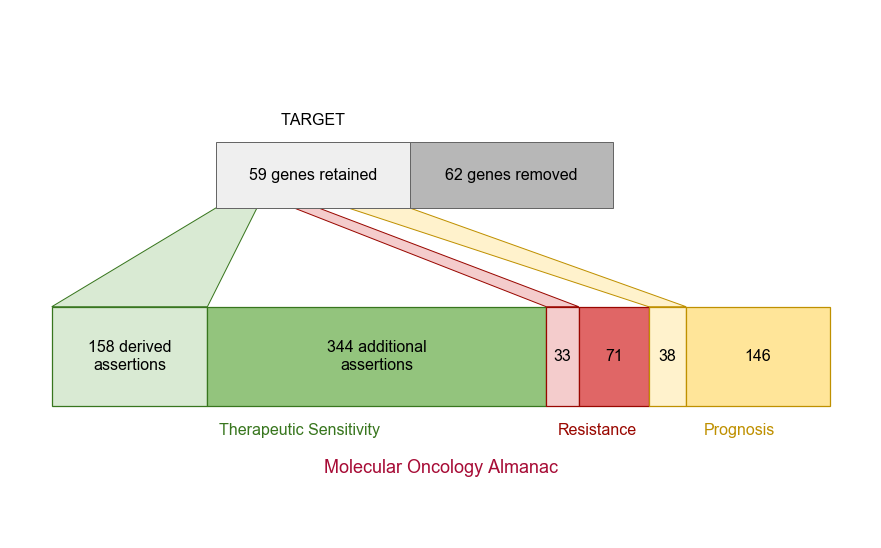

In [7]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(12.13, 7.5))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

rectangles = {
    '{} genes retained'.format(value_target_kept): patches.Rectangle(
        (target_kept_x0, target_kept_y0), 
        target_kept_width, target_kept_height, 
        linewidth=1, edgecolor=colors.google['dark grey 3'], facecolor=colors.google['light grey 2']
    ),
    
    '{} genes removed'.format(value_target_reject): patches.Rectangle(
        (target_reject_x0, target_reject_y0), 
        target_reject_width, target_reject_height, 
        linewidth=1, edgecolor=colors.google['dark grey 3'], facecolor=colors.google['dark grey 1']
    ),
    
    'TARGET': patches.Rectangle(
        (target_label_x0, target_label_y0),
        target_label_width, target_label_height,
        linewidth=0, edgecolor='none', facecolor='none'
    ),
    
    '{} derived\nassertions'.format(almanac_counts.loc['sensitive', 'target']): patches.Rectangle(
        (sensitive_derived_x0, sensitive_derived_y0),
        sensitive_derived_width, sensitive_derived_height,
        linewidth=1.25, edgecolor=colors.google['dark green 2'], facecolor=colors.google['light green 3']
    ),
    
    '{} additional\nassertions'.format(almanac_counts.loc['sensitive', 'added']): patches.Rectangle(
        (sensitive_novel_x0, sensitive_novel_y0),
        sensitive_novel_width, sensitive_novel_height,
        linewidth=1.25, edgecolor=colors.google['dark green 2'], facecolor=colors.google['light green 1']
    ),
    
    '{}'.format(almanac_counts.loc['resistance', 'target']): patches.Rectangle(
        (resistance_derived_x0, resistance_derived_y0),
        resistance_derived_width, resistance_derived_height,
        linewidth=1.25, edgecolor=colors.google['dark red 2'], facecolor=colors.google['light red 3']
    ),
    
    '{}'.format(almanac_counts.loc['resistance', 'added']): patches.Rectangle(
        (resistance_novel_x0, resistance_novel_y0),
        resistance_novel_width, resistance_novel_height,
        linewidth=1.25, edgecolor=colors.google['dark red 2'], facecolor=colors.google['light red 1']
    ),
    
    '{}'.format(almanac_counts.loc['prognosis', 'target']): patches.Rectangle(
        (prognosis_derived_x0, prognosis_derived_y0),
        prognosis_derived_width, prognosis_derived_height,
        linewidth=1.25, edgecolor=colors.google['dark yellow 2'], facecolor=colors.google['light yellow 3']
    ),
    
    '{}'.format(almanac_counts.loc['prognosis', 'added']): patches.Rectangle(
        (prognosis_novel_x0, prognosis_novel_y0),
        prognosis_novel_width, prognosis_novel_height,
        linewidth=1.25, edgecolor=colors.google['dark yellow 2'], facecolor=colors.google['light yellow 2']
    )
}

polygons = {
    'derived_sensitive': [
        [sensitive_derived_x0, sensitive_derived_y0 + sensitive_derived_height], 
        [sensitive_derived_x0 + sensitive_derived_width, sensitive_derived_y0 + sensitive_derived_height], 
        [target_kept_x0 + 50, target_kept_y0], 
        [target_kept_x0, target_kept_y0]],
    'derived_resistance': [
        [resistance_derived_x0, resistance_derived_y0 + resistance_derived_height], 
        [resistance_derived_x0 + resistance_derived_width, resistance_derived_y0 + resistance_derived_height], 
        [target_kept_x0 + 125, target_kept_y0], 
        [target_kept_x0 + 95, target_kept_y0]],
    'derived_prognosis': [
        [prognosis_derived_x0, prognosis_derived_y0 + prognosis_derived_height], 
        [prognosis_derived_x0 + prognosis_derived_width, prognosis_derived_y0 + prognosis_derived_height], 
        [target_reject_x0, target_kept_y0], 
        [target_reject_x0 - 75, target_kept_y0]],
}

labels = {
    'Therapeutic Sensitivity': {
        'patch': patches.Rectangle(
            (sensitive_label_x0, sensitive_label_y0), 
            sensitive_label_width, sensitive_label_height,
            linewidth=0, edgecolor='none', facecolor='none'),
        'color': colors.google['dark green 2'],
        'fontsize': 16},
    'Resistance': {
        'patch': patches.Rectangle(
            (resistance_label_x0, resistance_label_y0), 
            resistance_label_width, resistance_label_height,
            linewidth=0, edgecolor='none', facecolor='none'),
        'color': colors.google['dark red 2'],
        'fontsize': 16},
    'Prognosis': {
        'patch': patches.Rectangle(
            (prognosis_label_x0, prognosis_label_y0), 
            prognosis_label_width, prognosis_label_height,
            linewidth=0, edgecolor='none', facecolor='none'),
        'color': colors.google['dark yellow 2'],
        'fontsize': 16},
    'Molecular Oncology Almanac': {
        'patch': patches.Rectangle(
            (title_label_x0, title_label_y0), 
            title_label_width, title_label_height,
            linewidth=0, edgecolor='none', facecolor='none'),
        'color': colors.almanac['red'],
        'fontsize': 18},
}

ax.add_patch(patches.Polygon(polygons['derived_sensitive'], 
                             edgecolor=colors.google['dark green 2'], facecolor=colors.google['light green 3']))
ax.add_patch(patches.Polygon(polygons['derived_resistance'], 
                             edgecolor=colors.google['dark red 2'], facecolor=colors.google['light red 3']))
ax.add_patch(patches.Polygon(polygons['derived_prognosis'], 
                             edgecolor=colors.google['dark yellow 2'], facecolor=colors.google['light yellow 3']))

for patch in rectangles:
    ax.add_patch(rectangles[patch])
    rx, ry = rectangles[patch].get_xy()
    cx = rx + rectangles[patch].get_width()/2.0
    cy = ry + rectangles[patch].get_height()/2.0
    
    ax.annotate(patch, (cx, cy), color='black', fontsize=16, ha='center', va='center')
    
for patch in labels:
    ax.add_patch(labels[patch]['patch'])
    rx, ry = labels[patch]['patch'].get_xy()
    cx = rx + labels[patch]['patch'].get_width()/2.0
    cy = ry + labels[patch]['patch'].get_height()/2.0
    
    ax.annotate(patch, (cx, cy), 
                color=labels[patch]['color'], fontsize=labels[patch]['fontsize'], ha='center', va='center')
    
plt.xlim([0, XLIM])
plt.ylim([0, YLIM])

plt.tick_params(axis="both", which="both", 
                bottom=False, top=False, left=False, right=False,  
                labelbottom=False, labeltop=False, labelleft=False, labelright=False) 
    
filename = 'figure-1-b'
folder = f'../../../figures/figure-01-b'
!mkdir -p $folder
for suffix in ['svg', 'png', 'pdf']:
    outname = f'{folder}/{filename}.{suffix}'
    plt.savefig(outname, format=suffix, bbox_inches='tight')
    
plt.show()

In [8]:
value_target_kept

59

In [9]:
value_target_reject

62

In [11]:
almanac_counts

,aneuploidy,silencing,germline_variant,mutational_burden,mutational_signature,rearrangement,neoantigen_burden,microsatellite_stability,knockdown,somatic_variant,copy_number,totals,target,added
resistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,90.0,12.0,104,33,71
sensitive,0.0,0.0,42.0,6.0,17.0,63.0,1.0,3.0,5.0,308.0,57.0,502,158,344
prognosis,1.0,1.0,56.0,0.0,0.0,5.0,0.0,1.0,3.0,106.0,11.0,184,38,146


In [21]:
tmp = {
    'TARGET retained': value_target_kept,
    'TARGET removed': value_target_reject,
    'MOAlmanac sensitive derived': almanac_counts.loc['sensitive', 'target'],
    'MOAlmanac sensitive novel': almanac_counts.loc['sensitive', 'added'],
    'MOAlmanac resistance derived': almanac_counts.loc['resistance', 'target'],
    'MOAlmanac resistance novel': almanac_counts.loc['resistance', 'added'],
    'MOAlmanac prognosis derived': almanac_counts.loc['prognosis', 'target'],
    'MOAlmanac prognosis novel': almanac_counts.loc['prognosis', 'added']
}

import openpyxl
(pd
 .Series(tmp)
 .to_frame()
 .reset_index()
 .rename(columns={'index': 'category', 0: 'counts'})
 .to_excel(f'{folder}/{filename}.xlsx', index=False)
)